In [3]:
from toise import effective_areas, angular_resolution
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import NullFormatter
import numpy as np
from matplotlib import style

matplotlib.style.u

In [17]:
style.use("../../figures/toise.mplstyle")

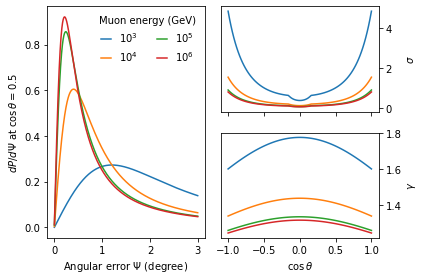

In [18]:
psf = angular_resolution.get_angular_resolution("Fictive")

fig = plt.figure(figsize=(6,3))
gs0 = gridspec.GridSpec(1,2,figure=fig)
gs1 = gs0[1].subgridspec(2,1)

ax0 = fig.add_subplot(gs0[0])
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1], sharex=ax1)

psi = np.linspace(0, 3, 1001)
ct = np.linspace(-1, 1, 101)
for loge in 3,4,5,6:
    ax0.plot(psi[:-1], np.diff(psf(np.radians(psi), 10**loge, 0.5))/np.diff(psi), label=f'$10^{{ {loge} }}$')
    sigma, gamma = psf.get_params(loge, ct)
    ax1.plot(ct, sigma)
    ax2.plot(ct, gamma)

ax0.set_xlabel(r'Angular error $\Psi$ (degree)')
ax0.set_ylabel(r'$dP/d\Psi$ at $\cos\theta = 0.5$')

for ax in ax1, ax2:
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel(r'$\sigma$')
ax2.set_xlabel(r"$\cos\theta$")
ax2.set_ylabel(r'$\gamma$')

fig.align_ylabels([ax1, ax2])
fig.align_xlabels([ax0, ax2])
# ax0.legend(title=r'Muon energy (GeV)', frameon=False, ncol=2, handlelength=1)
ax0.legend(title=r'Muon energy (GeV)', ncol=2)

plt.tight_layout()

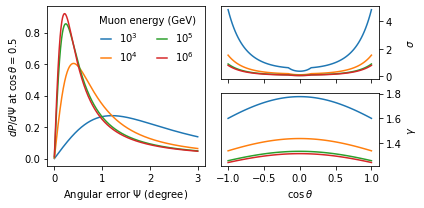

In [ ]:
psf = angular_resolution.get_angular_resolution("Potemkin")

fig = plt.figure(figsize=(6,3))
gs0 = gridspec.GridSpec(1,2,figure=fig)
gs1 = gs0[1].subgridspec(2,1)

ax0 = fig.add_subplot(gs0[0])
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1], sharex=ax1)

psi = np.linspace(0, 3, 1001)
ct = np.linspace(-1, 1, 101)
for loge in 3,4,5,6:
    ax0.plot(psi[:-1], np.diff(psf(np.radians(psi), 10**loge, 0.5))/np.diff(psi), label=f'$10^{{ {loge} }}$')
    sigma, gamma = psf.get_params(loge, ct)
    ax1.plot(ct, sigma)
    ax2.plot(ct, gamma)

ax0.set_xlabel(r'Angular error $\Psi$ (degree)')
ax0.set_ylabel(r'$dP/d\Psi$ at $\cos\theta = 0.5$')

for ax in ax1, ax2:
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel(r'$\sigma$')
ax2.set_xlabel(r"$\cos\theta$")
ax2.set_ylabel(r'$\gamma$')

fig.align_ylabels([ax1, ax2])
fig.align_xlabels([ax0, ax2])
ax0.legend(title=r'Muon energy (GeV)', frameon=False, ncol=2, handlelength=1)

plt.tight_layout()

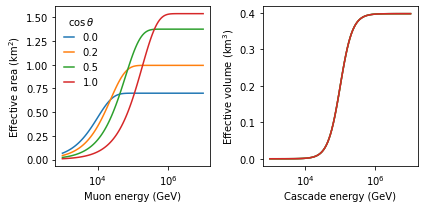

In [93]:
surface = effective_areas.get_fiducial_surface("Potemkin")
seleff = effective_areas.get_muon_selection_efficiency("Potemkin", 125)
contained_seleff = effective_areas.HECascadeSelectionEfficiency("Potemkin", energy_threshold=1e5)

aeff = lambda energy, ct: surface.azimuth_averaged_area(ct)*seleff(energy, ct)/1e6
veff = lambda energy, ct: surface.volume()*contained_seleff(energy, ct)/1e9

fig = plt.figure(figsize=(6,3))
gs0 = gridspec.GridSpec(1,2,figure=fig)

ax0 = fig.add_subplot(gs0[0])
ax1 = fig.add_subplot(gs0[1])

energy = np.logspace(3, 7, 101)
for ct in (0.0, 0.2, 0.5, 1.0):
    ax0.semilogx(
        energy,
        aeff(energy, ct),
        label=ct
    )
    ax1.semilogx(
        energy,
        veff(energy, ct),
        label=ct
    )

ax0.legend(title=r'$\cos\theta$', frameon=False, ncol=1, handlelength=1)
ax0.set_xlabel('Muon energy (GeV)')
ax0.set_ylabel('Effective area (km$^2$)')

ax1.set_xlabel('Cascade energy (GeV)')
ax1.set_ylabel('Effective volume (km$^3$)')

plt.tight_layout()

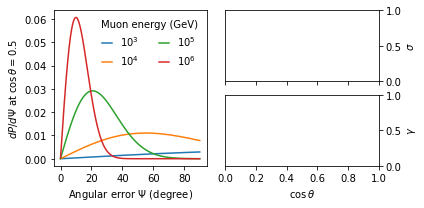

In [59]:
psf = angular_resolution.get_angular_resolution(channel="cascade")

fig = plt.figure(figsize=(6,3))
gs0 = gridspec.GridSpec(1,2,figure=fig)
gs1 = gs0[1].subgridspec(2,1)

ax0 = fig.add_subplot(gs0[0])
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1], sharex=ax1)

psi = np.linspace(0, 90, 1001)
ct = np.linspace(-1, 1, 101)
for loge in 3,4,5,6:
    ax0.plot(psi[:-1], np.diff(psf(np.radians(psi), 10**loge, 0.5))/np.diff(psi), label=f'$10^{{ {loge} }}$')
    sigma = psf.get_params(loge, ct)
    # ax1.plot(ct, sigma)
    # ax2.plot(ct, gamma)

ax0.set_xlabel(r'Angular error $\Psi$ (degree)')
ax0.set_ylabel(r'$dP/d\Psi$ at $\cos\theta = 0.5$')

for ax in ax1, ax2:
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel(r'$\sigma$')
ax2.set_xlabel(r"$\cos\theta$")
ax2.set_ylabel(r'$\gamma$')

ax0.legend(title=r'Muon energy (GeV)', frameon=False, ncol=2, handlelength=1)

plt.tight_layout()